<a href="https://colab.research.google.com/github/Mini1521/Sentiment-Analysis/blob/main/Using_Microsoft_and_Tesla_Dataset_from_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ANN CODE DOES NOT WORK !!!!**

# Stock Data- preprocessing

In [1]:
import pandas as pd

# Load the two CSV files
df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/OG - Datasets/Company.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/OG - Datasets/CompanyValues.csv")

# Merge the data on a common column (e.g., 'day_date')
merged_df = pd.merge(df1, df2, on="ticker_symbol", how="left")  # Use "outer", "left", or "right" if needed

# Save the merged dataset to a new CSV file
merged_df.to_csv("merged_data.csv", index=False)

print("Merged CSV saved as 'merged_data.csv'")

Merged CSV saved as 'merged_data.csv'


In [2]:
import pandas as pd

# Load the dataset (update the filename if needed)
df = pd.read_csv('/content/merged_data.csv')

df.rename(columns={'post_date': 'date'}, inplace=True)

# Convert 'day_date' to datetime format
df['day_date'] = pd.to_datetime(df['day_date'], errors='coerce')

# Filter data for the year 2020
df_2019 = df[df['day_date'].dt.year == 2019]
df_2019 = df_2019.sort_values(by='day_date', ascending=True)

# Separate data for Microsoft (MSFT) and Tesla (TSLA)
msft_data = df_2019[df_2019['ticker_symbol'] == 'MSFT']
tsla_data = df_2019[df_2019['ticker_symbol'] == 'TSLA']

# Drop rows with missing values
msft_data = msft_data.dropna()
tsla_data = tsla_data.dropna()


# print(" Stock Data Date Range:")
# print(f"Start Date: {msft_data['day_date'].min()} | End Date: {msft_data['day_date'].max()}")
# print(f"Start Date: {tsla_data['day_date'].min()} | End Date: {tsla_data['day_date'].max()}")

# Save each dataset separately
msft_data.to_csv("msft_2019.csv", index=False)
tsla_data.to_csv("tsla_2019.csv", index=False)

print("Data preprocessing complete.")
print("Saved: 'msft_2019.csv' and 'tsla_2019.csv'")


Data preprocessing complete.
Saved: 'msft_2019.csv' and 'tsla_2019.csv'


# Social Media - preprocessing

In [3]:
import numpy as np
import pandas as pd

# Load datasets
company_tweets = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/OG - Datasets/Company_Tweet.csv")
tweets = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/OG - Datasets/Tweet.csv")

# Merge tweets with company information
tweets = tweets.merge(company_tweets, how='left', on='tweet_id')

In [4]:
# Convert 'post_date' to datetime format
tweets['date'] = pd.to_datetime(tweets['post_date'], unit='s').dt.date
tweets['date'] = pd.to_datetime(tweets['date'], errors='coerce')
# tweets['time'] = pd.to_datetime(tweets['post_date'], unit='s').dt.time

tweets.to_csv("merged_tweets.csv", index=False)

tweets.drop(columns=['comment_num', 'retweet_num', 'like_num'], inplace=True)

In [5]:
# Filter for Microsoft (MSFT) and Tesla (TSLA)
tweets_filtered = tweets[tweets['ticker_symbol'].isin(['MSFT', 'TSLA'])]

# Keep only tweets from 2019
tweets_filtered = tweets_filtered[tweets_filtered['date'].dt.year == 2019]

# Split into separate datasets
msft_tweets = tweets_filtered[tweets_filtered['ticker_symbol'] == 'MSFT']
tsla_tweets = tweets_filtered[tweets_filtered['ticker_symbol'] == 'TSLA']

# Save to CSV files
msft_tweets.to_csv("msft_tweets_2019.csv", index=False)
tsla_tweets.to_csv("tsla_tweets_2019.csv", index=False)

# Cleaning of microsoft tweets

In [6]:
import re
import pandas as pd
import string
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

# Load Twitter dataset
tweets_df = pd.read_csv("/content/msft_tweets_2019.csv")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [7]:
# rename columns
tweets_df.rename(columns={'body': 'Tweet'}, inplace=True)
tweets_df.rename(columns={'post_date': 'day_date'}, inplace=True)

# Droping Duplicates
tweets_df.drop_duplicates(subset=['Tweet'], inplace=True)

# Handle Missing Values
tweets_df.dropna(subset=['Tweet'], inplace=True)  # Drop rows where 'Tweet' is empty

# Ensure 'date' is in datetime format
tweets_df['date'] = pd.to_datetime(tweets_df['date'], errors='coerce')

tweets_df = tweets_df.sort_values(by='date', ascending=True)

In [8]:
# Initialize preprocessing tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.strip()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatization
    return ' '.join(words)


In [9]:
# Apply cleaning function
tweets_df['cleaned_tweet'] = tweets_df['Tweet'].astype(str).apply(clean_text)

#Saving the cleaned data for further analysis
tweets_df.to_csv("cleaned_msft_tweets.csv", index=False)

# Cleaning of tesla tweets

In [10]:
# Load Twitter dataset
tweets_df = pd.read_csv("/content/tsla_tweets_2019.csv")

In [11]:
# rename columns
tweets_df.rename(columns={'body': 'Tweet'}, inplace=True)
tweets_df.rename(columns={'post_date': 'day_date'}, inplace=True)

# Droping Duplicates
tweets_df.drop_duplicates(subset=['Tweet'], inplace=True)

# Handle Missing Values
tweets_df.dropna(subset=['Tweet'], inplace=True)  # Drop rows where 'Tweet' is empty

In [12]:
# Ensure 'date' is in datetime format
tweets_df['date'] = pd.to_datetime(tweets_df['date'], errors='coerce')

tweets_df = tweets_df.sort_values(by='date', ascending=True)

In [13]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.strip()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatization
    return ' '.join(words)

In [14]:
# Apply cleaning function
tweets_df['cleaned_tweet'] = tweets_df['Tweet'].astype(str).apply(clean_text)

#Saving the cleaned data for further analysis
tweets_df.to_csv("cleaned_tsla_tweets.csv", index=False)

# Microsoft Articles - Preprocessing

In [15]:
import re
import pandas as pd
import string
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

# Load the dataset (Update the filename if needed)
article = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/OG - Datasets/msft_articles.csv")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
# Convert 'date' column to datetime format
article['date'] = pd.to_datetime(article['date'], errors='coerce')

# Filter for only the year 2020
year_2020 = article[article['date'].dt.year == 2020]
year_2020 = year_2020.sort_values(by='date', ascending=True)

# Drop rows with missing values
year_2020 = year_2020.dropna()

In [17]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.strip()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatization
    return ' '.join(words)

In [18]:
# Apply text cleaning to the 'text' column
year_2020['text'] = year_2020['text'].astype(str).apply(clean_text)

# Save the cleaned dataset
year_2020.to_csv("cleaned_msft_articles.csv", index=False)

# Tesla Articles - Preprocessing

In [19]:
# Load the dataset (Update the filename if needed)
article = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/OG - Datasets/tsla_articles.csv')

In [20]:
# Convert 'date' column to datetime format
article['date'] = pd.to_datetime(article['date'], errors='coerce')

# Filter for only the year 2020
year_2020 = article[article['date'].dt.year == 2020]
year_2020 = year_2020.sort_values(by='date', ascending=True)

# Drop rows with missing values
year_2020 = year_2020.dropna()

In [21]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.strip()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatization
    return ' '.join(words)

In [22]:
# Apply text cleaning to the 'text' column
year_2020['text'] = year_2020['text'].astype(str).apply(clean_text)

# Save the cleaned dataset
year_2020.to_csv("cleaned_tsla_articles.csv", index=False)

# Sentiment Analysis- microsoft

In [23]:
!pip install textblob

In [24]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

# Load datasets
tweets_df = pd.read_csv("/content/cleaned_msft_tweets.csv")
news_df = pd.read_csv("/content/cleaned_msft_articles.csv")

# Ensure text column is string type
tweets_df['Tweet'] = tweets_df['Tweet'].astype(str)
news_df['text'] = news_df['text'].astype(str)

In [25]:
# VADER Sentiment Analysis for Tweets

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Function to get sentiment score from VADER
def get_vader_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    return 1 if score > 0 else (-1 if score < 0 else 0)

# Apply VADER sentiment analysis to tweets
tweets_df['sentiment'] = tweets_df['Tweet'].apply(get_vader_sentiment)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [26]:
# TextBlob Sentiment Analysis for News

# Function to get sentiment score from TextBlob
def get_textblob_sentiment(text):
    score = TextBlob(text).sentiment.polarity
    return 1 if score > 0 else (-1 if score < 0 else 0)

# Apply TextBlob sentiment analysis to news articles
news_df['sentiment'] = news_df['text'].apply(get_textblob_sentiment)

# Save sentiment-labeled datasets
tweets_df.to_csv("sentiment_msft_tweets.csv", index=False)
news_df.to_csv("sentiment_msft_news.csv", index=False)

print("Sentiment analysis complete! Results saved.")

Sentiment analysis complete! Results saved.


# Using LSTM for sentiment Analysis

In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load preprocessed datasets
tweets_df = pd.read_csv("/content/sentiment_msft_tweets.csv")
news_df = pd.read_csv("/content/sentiment_msft_news.csv")

# Train-test split for Tweets
X_tweets, X_test_tweets, y_tweets, y_test_tweets = train_test_split(
    tweets_df['cleaned_tweet'], tweets_df['sentiment'], test_size=0.2, random_state=42
)

# Train-test split for News
X_news, X_test_news, y_news, y_test_news = train_test_split(
    news_df['text'], news_df['sentiment'], test_size=0.2, random_state=42
)

# Function to train models
def train_model(X_train, y_train, X_test, y_test, model):
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000)),
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Model {model.__class__.__name__} Accuracy: {accuracy:.4f}")
    return pipeline

# Models to Train
models = {
    'Naïve Bayes': MultinomialNB(),
    'SVM': SVC(kernel='linear'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}

# Train models for Tweets
print("\n Training Models for Tweet Sentiment Classification ")
trained_models_tweets = {
    name: train_model(X_tweets, y_tweets, X_test_tweets, y_test_tweets, model)
    for name, model in models.items()
}

# Train models for News
print("\n Training Models for News Sentiment Classification ")
trained_models_news = {
    name: train_model(X_news, y_news, X_test_news, y_test_news, model)
    for name, model in models.items()
}


 Training Models for Tweet Sentiment Classification 
Model MultinomialNB Accuracy: 0.7532
Model SVC Accuracy: 0.8911
Model DecisionTreeClassifier Accuracy: 0.8086
Model RandomForestClassifier Accuracy: 0.8573

 Training Models for News Sentiment Classification 
Model MultinomialNB Accuracy: 0.6032
Model SVC Accuracy: 0.6032
Model DecisionTreeClassifier Accuracy: 0.4444
Model RandomForestClassifier Accuracy: 0.5873


Training Models for Tweet Sentiment Classification
* Model MultinomialNB Accuracy: 0.7532
* Model SVC Accuracy: 0.8911
* Model DecisionTreeClassifier Accuracy: 0.8057
* Model RandomForestClassifier Accuracy: 0.8523

Training Models for News Sentiment Classification
* Model MultinomialNB Accuracy: 0.6032
* Model SVC Accuracy: 0.6032
* Model DecisionTreeClassifier Accuracy: 0.4762
* Model RandomForestClassifier Accuracy: 0.5397



In [28]:
# # Save the best-performing model for predictions
# import joblib
# best_model = trained_models['Random Forest']  # Assuming Random Forest performed best
# joblib.dump(best_model, "sentiment_model.pkl")

# print("Sentiment Analysis Complete")

# Using ANN for Sentiment Analysis

**CODE NOT WORKING**

In [30]:
!pip install tensorflow

In [31]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SpatialDropout1D, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Load the preprocessed datasets for tweets and news
tweets_df = pd.read_csv('/content/sentiment_msft_tweets.csv')  # replace with your actual dataset path
news_df = pd.read_csv('/content/sentiment_msft_news.csv')  # replace with your actual news dataset path

# Assuming that the preprocessed data has the 'cleaned_text' and 'sentiment' columns already.
# Step 4: Encoding Sentiment Labels (assuming 'sentiment' column with Positive, Negative, Neutral)
encoder = LabelEncoder()
tweets_df['encoded_sentiment'] = encoder.fit_transform(tweets_df['sentiment'])
news_df['encoded_sentiment'] = encoder.fit_transform(news_df['sentiment'])

y_tweets = tweets_df['encoded_sentiment']
y_news = news_df['encoded_sentiment']

# Step 5: Tokenizing the Text Data (using preprocessed 'cleaned_text')
tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(tweets_df['cleaned_tweet'])
X_tweets = tokenizer.texts_to_sequences(tweets_df['cleaned_tweet'])
X_tweets = pad_sequences(X_tweets, maxlen=100)

tokenizer.fit_on_texts(news_df['text'])
X_news = tokenizer.texts_to_sequences(news_df['text'])
X_news = pad_sequences(X_news, maxlen=100)

# Step 6: Splitting Data into Training and Testing Sets
X_train_tweets, X_test_tweets, y_train_tweets, y_test_tweets = train_test_split(X_tweets, y_tweets, test_size=0.2, random_state=42)
X_train_news, X_test_news, y_train_news, y_test_news = train_test_split(X_news, y_news, test_size=0.2, random_state=42)

# Step 7: Building ANN Model for Tweets Sentiment Classification
# tweet_model = Sequential()
# # tweet_model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
# tweet_model.add(Embedding(input_dim=5000, output_dim=128))
# tweet_model.add(SpatialDropout1D(0.2))
# tweet_model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
# tweet_model.add(Dense(3, activation='softmax'))  # 3 classes: Positive, Negative, Neutral

# tweet_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# tweet_history = tweet_model.fit(X_train_tweets, y_train_tweets, epochs=5, batch_size=64, validation_data=(X_test_tweets, y_test_tweets), verbose=2)

tweet_model = Sequential()
tweet_model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
tweet_model.add(SpatialDropout1D(0.2))
tweet_model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
tweet_model.add(Dense(3, activation='softmax'))  # 3 classes: Positive, Negative, Neutral

tweet_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
tweet_history = tweet_model.fit(X_train_tweets, y_train_tweets, epochs=5, batch_size=64, validation_data=(X_test_tweets, y_test_tweets), verbose=2)

# Step 8: Building ANN Model for News Sentiment Classification
news_model = Sequential()
# news_model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
news_model.add(Embedding(input_dim=5000, output_dim=128))

news_model.add(SpatialDropout1D(0.2))
news_model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
news_model.add(Dense(3, activation='softmax'))  # 3 classes: Positive, Negative, Neutral

news_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
news_history = news_model.fit(X_train_news, y_train_news, epochs=5, batch_size=64, validation_data=(X_test_news, y_test_news), verbose=2)

# Step 9: Evaluating the Models
# Evaluate Tweets Model
y_pred_tweets = tweet_model.predict(X_test_tweets)
y_pred_tweets = np.argmax(y_pred_tweets, axis=1)

# Evaluate News Model
y_pred_news = news_model.predict(X_test_news)
y_pred_news = np.argmax(y_pred_news, axis=1)

# Performance Metrics for Tweets
print("Tweets Sentiment Classification Report:")
print(classification_report(y_test_tweets, y_pred_tweets))
print(confusion_matrix(y_test_tweets, y_pred_tweets))

# Performance Metrics for News
print("News Sentiment Classification Report:")
print(classification_report(y_test_news, y_pred_news))
print(confusion_matrix(y_test_news, y_pred_news))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
719/719 - 226s - 314ms/step - accuracy: 0.7869 - loss: 0.5514 - val_accuracy: 0.8863 - val_loss: 0.3596
Epoch 2/5
719/719 - 212s - 295ms/step - accuracy: 0.9020 - loss: 0.3098 - val_accuracy: 0.9041 - val_loss: 0.3192
Epoch 3/5
719/719 - 266s - 370ms/step - accuracy: 0.9146 - loss: 0.2734 - val_accuracy: 0.9034 - val_loss: 0.3156
Epoch 4/5
719/719 - 257s - 358ms/step - accuracy: 0.9227 - loss: 0.2488 - val_accuracy: 0.9050 - val_loss: 0.3111
Epoch 5/5
719/719 - 266s - 370ms/step - accuracy: 0.9268 - loss: 0.2299 - val_accuracy: 0.9030 - val_loss: 0.3236
Epoch 1/5
4/4 - 7s - 2s/step - accuracy: 0.4120 - loss: 1.0942 - val_accuracy: 0.5873 - val_loss: 1.0746
Epoch 2/5
4/4 - 2s - 506ms/step - accuracy: 0.4920 - loss: 1.0655 - val_accuracy: 0.5873 - val_loss: 1.0254
Epoch 3/5
4/4 - 2s - 421ms/step - accuracy: 0.4920 - loss: 1.0459 - val_accuracy: 0.5873 - val_loss: 0.9887
Epoch 4/5
4/4 - 2s - 486ms/step - accuracy: 0.4920 - loss: 1.0027 - val_accuracy: 0.5873 - val_loss: 1.0011
E

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**wait time for compiling is almost 30 mins**

Epoch 1/5

719/719 - 171s - loss: 0.5244 - accuracy: 0.8012 - val_loss: 0.3485 - val_accuracy: 0.8920 - 171s/epoch - 238ms/step

Epoch 2/5

719/719 - 167s - loss: 0.3019 - accuracy: 0.9046 - val_loss: 0.3127 - val_accuracy: 0.9043 - 167s/epoch - 232ms/step

Epoch 3/5

719/719 - 167s - loss: 0.2631 - accuracy: 0.9160 - val_loss: 0.3165 - val_accuracy: 0.9011 - 167s/epoch - 232ms/step

Epoch 4/5

719/719 - 166s - loss: 0.2374 - accuracy: 0.9238 - val_loss: 0.3271 - val_accuracy: 0.9006 - 166s/epoch - 231ms/step

Epoch 5/5

719/719 - 169s - loss: 0.2134 - accuracy: 0.9310 - val_loss: 0.3373 - val_accuracy: 0.9060 - 169s/epoch - 235ms/step

Epoch 1/5

4/4 - 4s - loss: 1.0942 - accuracy: 0.4520 - val_loss: 1.0805 - val_accuracy: 0.5873 - 4s/epoch - 1s/step

Epoch 2/5

4/4 - 1s - loss: 1.0685 - accuracy: 0.4920 - val_loss: 1.0473 - val_accuracy: 0.5873 - 988ms/epoch - 247ms/step

Epoch 3/5

4/4 - 1s - loss: 1.0333 - accuracy: 0.4920 - val_loss: 0.9976 - val_accuracy: 0.5873 - 947ms/epoch - 237ms/step

Epoch 4/5

4/4 - 1s - loss: 1.0035 - accuracy: 0.4920 - val_loss: 0.9927 - val_accuracy: 0.5873 - 946ms/epoch - 236ms/step

Epoch 5/5

4/4 - 1s - loss: 0.9696 - accuracy: 0.4920 - val_loss: 0.9814 - val_accuracy: 0.5873 - 923ms/epoch - 231ms/step

360/360 [==============================] - 9s 24ms/step

2/2 [==============================] - 0s 16ms/step

Tweets Sentiment Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.64      0.74      1522
           1       0.91      0.96      0.93      4818
           2       0.91      0.94      0.92      5160

    accuracy                           0.91     11500

   macro avg       0.89      0.85      0.86     11500

weighted avg       0.90      0.91      0.90     11500


[[ 979  222  321]

 [  62 4605  151]

 [  97  228 4835]]

News Sentiment Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        17
           2       0.59      1.00      0.74        37

    accuracy                           0.59        63

   macro avg       0.20      0.33      0.25        63

weighted avg       0.34      0.59      0.43        63


[[ 0  0  9]

 [ 0  0 17]

 [ 0  0 37]]

# Sentiment Analysis- tesla

ALGORITHMS WORKS !!!

In [32]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

# Load datasets
tweets_df = pd.read_csv("/content/cleaned_tsla_tweets.csv")
news_df = pd.read_csv("/content/cleaned_tsla_articles.csv")

# Ensure text column is string type
tweets_df['Tweet'] = tweets_df['Tweet'].astype(str)
news_df['text'] = news_df['text'].astype(str)

In [33]:
# VADER Sentiment Analysis for Tweets

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
# Function to get sentiment score from VADER
def get_vader_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    return 1 if score > 0 else (-1 if score < 0 else 0)

# Apply VADER sentiment analysis to tweets
tweets_df['sentiment'] = tweets_df['Tweet'].apply(get_vader_sentiment)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [34]:
# TextBlob Sentiment Analysis for News

# Function to get sentiment score from TextBlob
def get_textblob_sentiment(text):
    score = TextBlob(text).sentiment.polarity
    return 1 if score > 0 else (-1 if score < 0 else 0)

# Apply TextBlob sentiment analysis to news articles
news_df['sentiment'] = news_df['text'].apply(get_textblob_sentiment)
news_df['sentiment'] = news_df['sentiment'].astype(int)

# Save sentiment-labeled datasets
tweets_df.to_csv("sentiment_tsla_tweets.csv", index=False)
news_df.to_csv("sentiment_tsla_news.csv", index=False)

print("Sentiment analysis complete! Results saved.")

Sentiment analysis complete! Results saved.


# Using LSTM for sentiment analysis

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load preprocessed datasets
tweets_df = pd.read_csv("/content/sentiment_msft_tweets.csv")
news_df = pd.read_csv("/content/sentiment_msft_news.csv")

tweets_df = tweets_df.sample(min(10000, len(tweets_df)), random_state=42)
news_df = news_df.sample(min(10000, len(news_df)), random_state=42)

# Train-test split for Tweets
X_tweets, X_test_tweets, y_tweets, y_test_tweets = train_test_split(
    tweets_df['cleaned_tweet'], tweets_df['sentiment'], test_size=0.2, random_state=42
)

# Train-test split for News
X_news, X_test_news, y_news, y_test_news = train_test_split(
    news_df['text'], news_df['sentiment'], test_size=0.2, random_state=42
)

# Function to train models
def train_model(X_train, y_train, X_test, y_test, model):
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000)),
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Model {model.__class__.__name__} Accuracy: {accuracy:.4f}")
    return pipeline

# Models to Train
models = {
    'Naïve Bayes': MultinomialNB(),
    'SVM': SVC(kernel='linear'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}

# Train models for Tweets
print("\n Training Models for Tweet Sentiment Classification ")
trained_models_tweets = {
    name: train_model(X_tweets, y_tweets, X_test_tweets, y_test_tweets, model)
    for name, model in models.items()
}

# Train models for News
print("\n Training Models for News Sentiment Classification ")
trained_models_news = {
    name: train_model(X_news, y_news, X_test_news, y_test_news, model)
    for name, model in models.items()
}



 Training Models for Tweet Sentiment Classification 
Model MultinomialNB Accuracy: 0.7215
Model SVC Accuracy: 0.8285
Model DecisionTreeClassifier Accuracy: 0.7750
Model RandomForestClassifier Accuracy: 0.7855

 Training Models for News Sentiment Classification 
Model MultinomialNB Accuracy: 0.5873
Model SVC Accuracy: 0.5556
Model DecisionTreeClassifier Accuracy: 0.5238
Model RandomForestClassifier Accuracy: 0.5079


Training Models for Tweet Sentiment Classification
*   Model MultinomialNB Accuracy: 0.7215
*   Model SVC Accuracy: 0.8285
*   Model DecisionTreeClassifier Accuracy: 0.7720
*   Model RandomForestClassifier Accuracy: 0.7880


Training Models for News Sentiment Classification
*   Model MultinomialNB Accuracy: 0.5873
*   Model SVC Accuracy: 0.5556
*   Model DecisionTreeClassifier Accuracy: 0.5397
*   Model RandomForestClassifier Accuracy: 0.5238


# Using ANN for sentiment analysis

**THIS IS CRASHING !!!! FIX IT !!!!**

In [37]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout

# # Load data
# tweets_df = pd.read_csv("/content/sentiment_tsla_tweets.csv")
# news_df = pd.read_csv("/content/sentiment_tsla_news.csv")

# # Function for data preprocessing
# def preprocess_data(df, text_column):
#     df[text_column] = df[text_column].astype(str)
#     X = df[text_column].values
#     y = df['sentiment'].values

#     # Convert labels (-1, 0, 1) into one-hot encoding
#     encoder = OneHotEncoder(sparse_output=False)
#     y = encoder.fit_transform(y.reshape(-1, 1))

#     return X, y

# X_tweets, y_tweets = preprocess_data(tweets_df, 'cleaned_tweet')
# X_news, y_news = preprocess_data(news_df, 'text')

# # TF-IDF Vectorization
# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer(max_features=5000)
# X_tweets = vectorizer.fit_transform(X_tweets).toarray()
# X_news = vectorizer.transform(X_news).toarray()

# # Train/Test Split
# X_train_tweets, X_test_tweets, y_train_tweets, y_test_tweets = train_test_split(X_tweets, y_tweets, test_size=0.2, random_state=42)
# X_train_news, X_test_news, y_train_news, y_test_news = train_test_split(X_news, y_news, test_size=0.2, random_state=42)

# # ANN Model
# def build_ann_model(input_dim):
#     model = Sequential([
#         Dense(512, activation='relu', input_shape=(input_dim,)),
#         Dropout(0.3),
#         Dense(256, activation='relu'),
#         Dropout(0.2),
#         Dense(3, activation='softmax')  # 3 classes (-1, 0, 1)
#     ])
#     model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#     return model

# # Train ANN for Tweets
# ann_tweet_model = build_ann_model(X_train_tweets.shape[1])
# ann_tweet_model.fit(X_train_tweets, y_train_tweets, epochs=10, batch_size=32, validation_data=(X_test_tweets, y_test_tweets))

# # Train ANN for News
# ann_news_model = build_ann_model(X_train_news.shape[1])
# ann_news_model.fit(X_train_news, y_train_news, epochs=20, batch_size=32, validation_data=(X_test_news, y_test_news))

# # Save models
# ann_tweet_model.save("ANN_TSLA_TWEET.h5")
# ann_news_model.save("ANN_TSLA_NEWS.h5")

# print(" ANN Sentiment Models Trained and Saved!")


# Importing necessary libraries
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SpatialDropout1D, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Load the preprocessed datasets for tweets and news
tweets_df = pd.read_csv('/content/sentiment_tsla_tweets.csv')  # replace with your actual dataset path
news_df = pd.read_csv('/content/sentiment_tsla_news.csv')  # replace with your actual news dataset path

# Replace NaN values with an empty string in both tweet and news data
tweets_df['cleaned_tweet'] = tweets_df['cleaned_tweet'].fillna('')
news_df['text'] = news_df['text'].fillna('')

# Alternatively, you can drop rows with NaN values if you prefer:
# tweets_df.dropna(subset=['cleaned_tweet'], inplace=True)
# news_df.dropna(subset=['text'], inplace=True)
# Ensure the columns are strings
tweets_df['cleaned_tweet'] = tweets_df['cleaned_tweet'].astype(str)
news_df['text'] = news_df['text'].astype(str)


# Assuming that the preprocessed data has the 'cleaned_text' and 'sentiment' columns already.
# Step 4: Encoding Sentiment Labels (assuming 'sentiment' column with Positive, Negative, Neutral)
encoder = LabelEncoder()
tweets_df['encoded_sentiment'] = encoder.fit_transform(tweets_df['sentiment'])
news_df['encoded_sentiment'] = encoder.fit_transform(news_df['sentiment'])

y_tweets = tweets_df['encoded_sentiment']
y_news = news_df['encoded_sentiment']

# Step 5: Tokenizing the Text Data (using preprocessed 'cleaned_text')
tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(tweets_df['cleaned_tweet'])
X_tweets = tokenizer.texts_to_sequences(tweets_df['cleaned_tweet'])
X_tweets = pad_sequences(X_tweets, maxlen=100)

tokenizer.fit_on_texts(news_df['text'])
X_news = tokenizer.texts_to_sequences(news_df['text'])
X_news = pad_sequences(X_news, maxlen=100)

# Step 6: Splitting Data into Training and Testing Sets
X_train_tweets, X_test_tweets, y_train_tweets, y_test_tweets = train_test_split(X_tweets, y_tweets, test_size=0.2, random_state=42)
X_train_news, X_test_news, y_train_news, y_test_news = train_test_split(X_news, y_news, test_size=0.2, random_state=42)

# Step 7: Building ANN Model for Tweets Sentiment Classification
# tweet_model = Sequential()
# # tweet_model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
# tweet_model.add(Embedding(input_dim=5000, output_dim=128))
# tweet_model.add(SpatialDropout1D(0.2))
# tweet_model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
# tweet_model.add(Dense(3, activation='softmax'))  # 3 classes: Positive, Negative, Neutral

# tweet_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# tweet_history = tweet_model.fit(X_train_tweets, y_train_tweets, epochs=5, batch_size=64, validation_data=(X_test_tweets, y_test_tweets), verbose=2)

tweet_model = Sequential()
tweet_model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
tweet_model.add(SpatialDropout1D(0.2))
tweet_model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
tweet_model.add(Dense(3, activation='softmax'))  # 3 classes: Positive, Negative, Neutral

tweet_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
tweet_history = tweet_model.fit(X_train_tweets, y_train_tweets, epochs=5, batch_size=64, validation_data=(X_test_tweets, y_test_tweets), verbose=2)

# Step 8: Building ANN Model for News Sentiment Classification
news_model = Sequential()
# news_model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
news_model.add(Embedding(input_dim=5000, output_dim=128))

news_model.add(SpatialDropout1D(0.2))
news_model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
news_model.add(Dense(3, activation='softmax'))  # 3 classes: Positive, Negative, Neutral

news_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
news_history = news_model.fit(X_train_news, y_train_news, epochs=5, batch_size=64, validation_data=(X_test_news, y_test_news), verbose=2)

# Step 9: Evaluating the Models
# Evaluate Tweets Model
y_pred_tweets = tweet_model.predict(X_test_tweets)
y_pred_tweets = np.argmax(y_pred_tweets, axis=1)

# Evaluate News Model
y_pred_news = news_model.predict(X_test_news)
y_pred_news = np.argmax(y_pred_news, axis=1)

# Performance Metrics for Tweets
print("Tweets Sentiment Classification Report:")
print(classification_report(y_test_tweets, y_pred_tweets))
print(confusion_matrix(y_test_tweets, y_pred_tweets))

# Performance Metrics for News
print("News Sentiment Classification Report:")
print(classification_report(y_test_news, y_pred_news))
print(confusion_matrix(y_test_news, y_pred_news))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
4544/4544 - 1295s - 285ms/step - accuracy: 0.8476 - loss: 0.4395 - val_accuracy: 0.8785 - val_loss: 0.3745
Epoch 2/5
4544/4544 - 1354s - 298ms/step - accuracy: 0.8808 - loss: 0.3646 - val_accuracy: 0.8867 - val_loss: 0.3514
Epoch 3/5
4544/4544 - 1314s - 289ms/step - accuracy: 0.8887 - loss: 0.3425 - val_accuracy: 0.8873 - val_loss: 0.3500
Epoch 4/5
4544/4544 - 1305s - 287ms/step - accuracy: 0.8927 - loss: 0.3280 - val_accuracy: 0.8895 - val_loss: 0.3490
Epoch 5/5
4544/4544 - 1299s - 286ms/step - accuracy: 0.8956 - loss: 0.3159 - val_accuracy: 0.8879 - val_loss: 0.3549
Epoch 1/5
3/3 - 8s - 3s/step - accuracy: 0.3803 - loss: 1.0958 - val_accuracy: 0.5833 - val_loss: 1.0691
Epoch 2/5
3/3 - 1s - 377ms/step - accuracy: 0.5845 - loss: 1.0560 - val_accuracy: 0.5833 - val_loss: 1.0241
Epoch 3/5
3/3 - 1s - 254ms/step - accuracy: 0.5845 - loss: 0.9970 - val_accuracy: 0.5833 - val_loss: 0.9730
Epoch 4/5
3/3 - 1s - 395ms/step - accuracy: 0.5845 - loss: 0.9573 - val_accuracy: 0.5833 - val

2272/2272 ━━━━━━━━━━━━━━━━━━━━ 109s 48ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 470ms/step
Tweets Sentiment Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.83     20075
           1       0.89      0.94      0.91     21900
           2       0.90      0.90      0.90     30720

    accuracy                           0.89     72695
   macro avg       0.88      0.88      0.88     72695
weighted avg       0.89      0.89      0.89     72695

[[16164  1598  2313]
 [  571 20637   692]
 [ 1979   999 27742]]
News Sentiment Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        11
           2       0.58      1.00      0.74        21

    accuracy                           0.58        36
   macro avg       0.19      0.33      0.25        36
weighted avg       0.34      0.58      0.43        36

[[ 0  0  4]

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**WAIT TIME FOR COMPILING IS ALMOST 2 HOURS**

Epoch 1/5

4544/4544 - 1295s - 285ms/step - accuracy: 0.8476 - loss: 0.4395 - val_accuracy: 0.8785 - val_loss: 0.3745

Epoch 2/5

4544/4544 - 1354s - 298ms/step - accuracy: 0.8808 - loss: 0.3646 - val_accuracy: 0.8867 - val_loss: 0.3514

Epoch 3/5

4544/4544 - 1314s - 289ms/step - accuracy: 0.8887 - loss: 0.3425 - val_accuracy: 0.8873 - val_loss: 0.3500

Epoch 4/5

4544/4544 - 1305s - 287ms/step - accuracy: 0.8927 - loss: 0.3280 - val_accuracy: 0.8895 - val_loss: 0.3490

Epoch 5/5

4544/4544 - 1299s - 286ms/step - accuracy: 0.8956 - loss: 0.3159 - val_accuracy: 0.8879 - val_loss: 0.3549

Epoch 1/5

3/3 - 8s - 3s/step - accuracy: 0.3803 - loss: 1.0958 - val_accuracy: 0.5833 - val_loss: 1.0691

Epoch 2/5

3/3 - 1s - 377ms/step - accuracy: 0.5845 - loss: 1.0560 - val_accuracy: 0.5833 - val_loss: 1.0241

Epoch 3/5

3/3 - 1s - 254ms/step - accuracy: 0.5845 - loss: 0.9970 - val_accuracy: 0.5833 - val_loss: 0.9730

Epoch 4/5

3/3 - 1s - 395ms/step - accuracy: 0.5845 - loss: 0.9573 - val_accuracy: 0.5833 - val_loss: 0.9622

Epoch 5/5

3/3 - 1s - 434ms/step - accuracy: 0.5845 - loss: 0.9171 - val_accuracy: 0.5833 - val_loss: 0.9695

WARNING:tensorflow:5 out of the last 363 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x79ab5ee69300> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.

2272/2272 ━━━━━━━━━━━━━━━━━━━━ 109s 48ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 470ms/step

Tweets Sentiment Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.81      0.83     20075
           1       0.89      0.94      0.91     21900
           2       0.90      0.90      0.90     30720

    accuracy                           0.89     72695

   macro avg       0.88      0.88      0.88     72695

weighted avg       0.89      0.89      0.89     72695


[[16164  1598  2313]

 [  571 20637   692]

 [ 1979   999 27742]]

News Sentiment Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        11
           2       0.58      1.00      0.74        21

    accuracy                           0.58        36
   macro avg       0.19      0.33      0.25        36

weighted avg       0.34      0.58      0.43        36

[[ 0  0  4]
 [ 0  0 11]
 [ 0  0 21]]


# Merging - Microsoft


In [38]:
import pandas as pd

# Load datasets
stock_data = pd.read_csv("/content/msft_2019.csv")
tweets_sentiment = pd.read_csv("/content/sentiment_msft_tweets.csv")
news_sentiment = pd.read_csv("/content/sentiment_msft_news.csv")

In [39]:
# Convert date columns to datetime
stock_data['day_date'] = pd.to_datetime(stock_data['day_date'])
tweets_sentiment['date'] = pd.to_datetime(tweets_sentiment['date'])
news_sentiment['date'] = pd.to_datetime(news_sentiment['date'])

In [40]:
# Extract Month-Day format (MM-DD)
stock_data['month_day'] = stock_data['day_date'].dt.strftime('%m-%d')
tweets_sentiment['month_day'] = tweets_sentiment['date'].dt.strftime('%m-%d')
news_sentiment['month_day'] = news_sentiment['date'].dt.strftime('%m-%d')

In [41]:
# # Drop original 'date' columns (Optional)
# stock_data.drop(columns=['day_date'], inplace=True)
# tweets_sentiment.drop(columns=['date'], inplace=True)
# news_sentiment.drop(columns=['date'], inplace=True)

In [42]:
# Stock & Tweets
stock_tweet_merged = stock_data.merge(tweets_sentiment, on='month_day', how='left')
stock_tweet_merged.fillna(0, inplace=True)
stock_tweet_merged = stock_tweet_merged.rename(columns={'sentiment_vader': 'tweet_sentiment'})
stock_tweet_merged.to_csv("Merge_MSFT_TWEET.csv", index=False)

In [43]:
# Stock & News
stock_news_merged = stock_data.merge(news_sentiment, on='month_day', how='left')
stock_news_merged.fillna(0, inplace=True)
stock_news_merged = stock_news_merged.rename(columns={'sentiment': 'news_sentiment'})
stock_news_merged.to_csv("Merge_MSFT_NEWS.csv", index=False)

print(" Merging done! Two separate files created: one for Tweets, one for News.")

 Merging done! Two separate files created: one for Tweets, one for News.


<ipython-input-43-225be7571668>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  stock_news_merged.fillna(0, inplace=True)


# Merging - Tesla

In [44]:
import pandas as pd

# Load datasets (assuming they are already preprocessed)
stock_data = pd.read_csv("/content/tsla_2019.csv")
tweets_sentiment = pd.read_csv("/content/sentiment_tsla_tweets.csv")
news_sentiment = pd.read_csv("/content/sentiment_tsla_news.csv")

In [45]:
# Convert date columns to datetime
stock_data['day_date'] = pd.to_datetime(stock_data['day_date'])
tweets_sentiment['date'] = pd.to_datetime(tweets_sentiment['date'])
news_sentiment['date'] = pd.to_datetime(news_sentiment['date'])

In [46]:
# Extract Month-Day format (MM-DD)
stock_data['month_day'] = stock_data['day_date'].dt.strftime('%m-%d')
tweets_sentiment['month_day'] = tweets_sentiment['date'].dt.strftime('%m-%d')
news_sentiment['month_day'] = news_sentiment['date'].dt.strftime('%m-%d')

In [47]:
# Stock & Tweets
stock_tweet_merged = stock_data.merge(tweets_sentiment, on='month_day', how='left')
stock_tweet_merged.fillna(0, inplace=True)
stock_tweet_merged = stock_tweet_merged.rename(columns={'sentiment_vader': 'tweet_sentiment'})
stock_tweet_merged.to_csv("Merge_TSLA_TWEET.csv", index=False)

In [48]:
# Stock & News
stock_news_merged = stock_data.merge(news_sentiment, on='month_day', how='left')
stock_news_merged.fillna(0, inplace=True)
stock_news_merged = stock_news_merged.rename(columns={'sentiment': 'news_sentiment'})
stock_news_merged.to_csv("Merge_TSLA_NEWS.csv", index=False)

print(" Merging done! Two separate files created: one for Tweets, one for News.")

 Merging done! Two separate files created: one for Tweets, one for News.


<ipython-input-48-df03a4931140>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  stock_news_merged.fillna(0, inplace=True)


# Stock Data Analysis (Microsoft)

In [49]:
import pandas as pd
import numpy as np

# Load both datasets
stock_tweet = pd.read_csv("/content/Merge_MSFT_TWEET.csv")
stock_news = pd.read_csv("/content/Merge_MSFT_NEWS.csv")

# Convert 'month_day' to datetime format
stock_tweet['month_day'] = pd.to_datetime(stock_tweet['month_day'], format='%m-%d')
stock_news['month_day'] = pd.to_datetime(stock_news['month_day'], format='%m-%d')

# Sort data chronologically
stock_tweet = stock_tweet.sort_values('month_day')
stock_news = stock_news.sort_values('month_day')

# Feature Engineering
for df in [stock_tweet, stock_news]:
    df['5_day_avg'] = df['close_value'].rolling(window=5).mean()
    df['10_day_avg'] = df['close_value'].rolling(window=10).mean()
    df['volatility'] = df['close_value'].pct_change().rolling(window=5).std()
    df.fillna(0, inplace=True)  # Fill missing values

# Save new files
stock_tweet.to_csv("MSFT_FEATURED_TWEET.csv", index=False)
stock_news.to_csv("MSFT_FEATURED_NEWS.csv", index=False)

print(" Feature Engineering Completed for Both Files!")


 Feature Engineering Completed for Both Files!


In [50]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load Tweet Data
tweet_data = pd.read_csv("/content/MSFT_FEATURED_TWEET.csv")

# Scale Features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(tweet_data[['close_value', 'sentiment', '5_day_avg', '10_day_avg', 'volatility']])

# Prepare Data for LSTM
X, y = [], []
for i in range(30, len(scaled_data)):
    X.append(scaled_data[i-30:i])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

# Build LSTM Model
model_tweet = Sequential()
model_tweet.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model_tweet.add(Dropout(0.2))
model_tweet.add(LSTM(units=50))
model_tweet.add(Dropout(0.2))
model_tweet.add(Dense(units=1))

model_tweet.compile(optimizer='adam', loss='mean_squared_error')
model_tweet.fit(X, y, epochs=10, batch_size=32)

# Save Model
model_tweet.save("LSTM_MSFT_TWEET.h5")

print(" LSTM Model Trained for Tweet Sentiment!")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 62s 32ms/step - loss: 0.0078
Epoch 2/10
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 60s 34ms/step - loss: 0.0011
Epoch 3/10
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 79s 32ms/step - loss: 6.1917e-04
Epoch 4/10
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 59s 33ms/step - loss: 4.6589e-04
Epoch 5/10
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - loss: 4.4120e-04
Epoch 6/10
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - loss: 4.1833e-04
Epoch 7/10
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 60s 33ms/step - loss: 4.1166e-04
Epoch 8/10
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 58s 32ms/step - loss: 4.0600e-04
Epoch 9/10
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - loss: 4.0316e-04
Epoch 10/10
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - loss: 3.9575e-04


 LSTM Model Trained for Tweet Sentiment!


**wait time for above compiling is almost 15 mins or so**

In [51]:
# Load News Data
news_data = pd.read_csv("/content/MSFT_FEATURED_NEWS.csv")

# Scale Features
scaled_news_data = scaler.fit_transform(news_data[['close_value', 'news_sentiment', '5_day_avg', '10_day_avg', 'volatility']])

# Prepare Data for LSTM
X_news, y_news = [], []
for i in range(30, len(scaled_news_data)):
    X_news.append(scaled_news_data[i-30:i])
    y_news.append(scaled_news_data[i, 0])

X_news, y_news = np.array(X_news), np.array(y_news)

# Build LSTM Model
model_news = Sequential()
model_news.add(LSTM(units=50, return_sequences=True, input_shape=(X_news.shape[1], X_news.shape[2])))
model_news.add(Dropout(0.2))
model_news.add(LSTM(units=50))
model_news.add(Dropout(0.2))
model_news.add(Dense(units=1))

model_news.compile(optimizer='adam', loss='mean_squared_error')
model_news.fit(X_news, y_news, epochs=20, batch_size=32)

# Save Model
model_news.save("LSTM_MSFT_NEWS.h5")

print("✅ LSTM Model Trained for News Sentiment!")


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.1149
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0234
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0120
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0106
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0081
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0065
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0058
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0057
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0068
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0058
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0051
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0049
Epoch 13/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0048
Epoch 14/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0047
Epoch 15/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0046
Epoch 16/20
15/

✅ LSTM Model Trained for News Sentiment!


In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predictions
tweet_pred = model_tweet.predict(X)
news_pred = model_news.predict(X_news)

# Evaluation
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name} - MAE: {mae:.4f}, RMSE: {rmse:.4f}")

evaluate_model(y, tweet_pred, "LSTM Tweet Model")
evaluate_model(y_news, news_pred, "LSTM News Model")
# y_pred = model_tweet.predict(X_test)  # Ensure model exists and has been trained

1796/1796 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step
LSTM Tweet Model - MAE: 0.0034, RMSE: 0.0053
LSTM News Model - MAE: 0.0337, RMSE: 0.0430


# Using ANN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load feature-engineered datasets
tweet_data = pd.read_csv("/content/MSFT_FEATURED_TWEET.csv")
news_data = pd.read_csv("/content/MSFT_FEATURED_NEWS.csv")

# Scale features
scaler = MinMaxScaler(feature_range=(0, 1))
X_tweets = scaler.fit_transform(tweet_data[['sentiment', '5_day_avg', '10_day_avg', 'volatility']])
y_tweets = scaler.fit_transform(tweet_data[['close_value']])

X_news = scaler.fit_transform(news_data[['news_sentiment', '5_day_avg', '10_day_avg', 'volatility']])
y_news = scaler.fit_transform(news_data[['close_value']])

# Train/Test Split
X_train_tweets, X_test_tweets, y_train_tweets, y_test_tweets = train_test_split(X_tweets, y_tweets, test_size=0.2, random_state=42)
X_train_news, X_test_news, y_train_news, y_test_news = train_test_split(X_news, y_news, test_size=0.2, random_state=42)

# ANN Model for Stock Prediction
def build_ann_stock_model(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dense(1)  # Single output neuron for regression
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train ANN for Tweet-based Stock Prediction
ann_stock_tweet_model = build_ann_stock_model(X_train_tweets.shape[1])
ann_stock_tweet_model.fit(X_train_tweets, y_train_tweets, epochs=10, batch_size=32, validation_data=(X_test_tweets, y_test_tweets))

# Train ANN for News-based Stock Prediction
ann_stock_news_model = build_ann_stock_model(X_train_news.shape[1])
ann_stock_news_model.fit(X_train_news, y_train_news, epochs=10, batch_size=32, validation_data=(X_test_news, y_test_news))

# Save models
ann_stock_tweet_model.save("ANN_MSFT_STOCK_TWEET.h5")
ann_stock_news_model.save("ANN_MSFT_STOCK_NEWS.h5")

print(" ANN Stock Prediction Models Trained and Saved!")


# Stock Data Analysis (Tesla)

In [53]:
import pandas as pd
import numpy as np

# Load both datasets
stock_tweet = pd.read_csv("/content/Merge_TSLA_TWEET.csv")
stock_news = pd.read_csv("/content/Merge_TSLA_NEWS.csv")

# Convert 'month_day' to datetime format
stock_tweet['month_day'] = pd.to_datetime(stock_tweet['month_day'], format='%m-%d')
stock_news['month_day'] = pd.to_datetime(stock_news['month_day'], format='%m-%d')

# Sort data chronologically
stock_tweet = stock_tweet.sort_values('month_day')
stock_news = stock_news.sort_values('month_day')

# Feature Engineering
for df in [stock_tweet, stock_news]:
    df['5_day_avg'] = df['close_value'].rolling(window=5).mean()
    df['10_day_avg'] = df['close_value'].rolling(window=10).mean()
    df['volatility'] = df['close_value'].pct_change().rolling(window=5).std()
    df.fillna(0, inplace=True)  # Fill missing values

# Save new files
stock_tweet.to_csv("TSLA_FEATURED_TWEET.csv", index=False)
stock_news.to_csv("TSLA_FEATURED_NEWS.csv", index=False)

print(" Feature Engineering Completed for Both Files!")


 Feature Engineering Completed for Both Files!


In [54]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load Tweet Data
tweet_data = pd.read_csv("/content/TSLA_FEATURED_TWEET.csv")

# Scale Features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(tweet_data[['close_value', 'sentiment', '5_day_avg', '10_day_avg', 'volatility']])

# Prepare Data for LSTM
X, y = [], []
for i in range(30, len(scaled_data)):
    X.append(scaled_data[i-30:i])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

# Build LSTM Model
model_tweet = Sequential()
model_tweet.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model_tweet.add(Dropout(0.2))
model_tweet.add(LSTM(units=50))
model_tweet.add(Dropout(0.2))
model_tweet.add(Dense(units=1))

model_tweet.compile(optimizer='adam', loss='mean_squared_error')
model_tweet.fit(X, y, epochs=7, batch_size=32)

# Save Model
model_tweet.save("LSTM_TSLA_TWEET.h5")

print(" LSTM Model Trained for Tweet Sentiment!")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/7
11358/11358 ━━━━━━━━━━━━━━━━━━━━ 378s 33ms/step - loss: 0.0012
Epoch 2/7
11358/11358 ━━━━━━━━━━━━━━━━━━━━ 372s 33ms/step - loss: 3.1885e-04
Epoch 3/7
11358/11358 ━━━━━━━━━━━━━━━━━━━━ 385s 33ms/step - loss: 3.0808e-04
Epoch 4/7
11358/11358 ━━━━━━━━━━━━━━━━━━━━ 382s 33ms/step - loss: 2.9224e-04
Epoch 5/7
11358/11358 ━━━━━━━━━━━━━━━━━━━━ 387s 34ms/step - loss: 2.8691e-04
Epoch 6/7
11358/11358 ━━━━━━━━━━━━━━━━━━━━ 376s 33ms/step - loss: 2.8371e-04
Epoch 7/7
11358/11358 ━━━━━━━━━━━━━━━━━━━━ 379s 33ms/step - loss: 2.7626e-04


 LSTM Model Trained for Tweet Sentiment!


**wait time for above compiling is almost 45 mins**

In [7]:
# Load News Data
news_data = pd.read_csv("/content/TSLA_FEATURED_NEWS.csv")

# Scale Features
scaled_news_data = scaler.fit_transform(news_data[['close_value', 'news_sentiment', '5_day_avg', '10_day_avg', 'volatility']])

# Prepare Data for LSTM
X_news, y_news = [], []
for i in range(30, len(scaled_news_data)):
    X_news.append(scaled_news_data[i-30:i])
    y_news.append(scaled_news_data[i, 0])

X_news, y_news = np.array(X_news), np.array(y_news)

# Build LSTM Model
model_news = Sequential()
model_news.add(LSTM(units=50, return_sequences=True, input_shape=(X_news.shape[1], X_news.shape[2])))
model_news.add(Dropout(0.2))
model_news.add(LSTM(units=50))
model_news.add(Dropout(0.2))
model_news.add(Dense(units=1))

model_news.compile(optimizer='adam', loss='mean_squared_error')
model_news.fit(X_news, y_news, epochs=25, batch_size=32)

# Save Model
model_news.save("LSTM_TSLA_NEWS.h5")

print("✅ LSTM Model Trained for News Sentiment!")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0682
Epoch 2/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0243
Epoch 3/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0140
Epoch 4/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0074
Epoch 5/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0080
Epoch 6/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0064
Epoch 7/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0060
Epoch 8/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0066
Epoch 9/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0064
Epoch 10/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0058
Epoch 11/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0047
Epoch 12/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0059
Epoch 13/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0052
Epoch 14/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0044
Epoch 15/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0045
Epoc

✅ LSTM Model Trained for News Sentiment!


In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predictions
tweet_pred = model_tweet.predict(X)
news_pred = model_news.predict(X_news)

# Evaluation
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name} - MAE: {mae:.4f}, RMSE: {rmse:.4f}")

evaluate_model(y, tweet_pred, "LSTM Tweet Model")
evaluate_model(y_news, news_pred, "LSTM News Model")
# y_pred = model_tweet.predict(X_test)  # Ensure model exists and has been trained

11358/11358 ━━━━━━━━━━━━━━━━━━━━ 114s 10ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step
LSTM Tweet Model - MAE: 0.0030, RMSE: 0.0041
LSTM News Model - MAE: 0.0366, RMSE: 0.0499


# New Section

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# import joblib

# # Assume X_train_tweets, y_train_tweets exist
# rf_tweet_model = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_tweet_model.fit(X_train_tweets, y_train_tweets)

# rf_news_model = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_news_model.fit(X_train_news, y_train_news)

# # Save the trained models
# joblib.dump(rf_tweet_model, "RF_TWEET.pkl")
# joblib.dump(rf_news_model, "RF_NEWS.pkl")

# print(" Random Forest models trained and saved successfully!")


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


✅ Random Forest models trained and saved successfully!


In [ ]:
# # import numpy as np
# # from sklearn.ensemble import VotingRegressor
# # from tensorflow.keras.models import load_model

# # # Load trained models
# # lstm_tweet_model = load_model("LSTM_MSFT_TWEET.h5")
# # lstm_news_model = load_model("LSTM_MSFT_NEWS.h5")
# # ann_stock_tweet_model = load_model("ANN_MSFT_STOCK_TWEET.h5")
# # ann_stock_news_model = load_model("ANN_MSFT_STOCK_NEWS.h5")

# # # Load ML Model (Random Forest)
# # rf_tweet_model = trained_models['Random Forest']  # Assuming trained_models contains the trained models
# # rf_news_model = trained_models['Random Forest']

# # # Ensemble Voting Regressor
# # ensemble_tweet = VotingRegressor([
# #     ('lstm', lstm_tweet_model),
# #     ('ann', ann_stock_tweet_model),
# #     ('rf', rf_tweet_model)
# # ])

# # ensemble_news = VotingRegressor([
# #     ('lstm', lstm_news_model),
# #     ('ann', ann_stock_news_model),
# #     ('rf', rf_news_model)
# # ])

# # # Train Ensemble Models
# # ensemble_tweet.fit(X_train_tweets, y_train_tweets)
# # ensemble_news.fit(X_train_news, y_train_news)

# # # Save Ensemble Models
# # import joblib
# # joblib.dump(ensemble_tweet, "ENSEMBLE_TWEET.pkl")
# # joblib.dump(ensemble_news, "ENSEMBLE_NEWS.pkl")

# # print(" Ensemble Learning Models Trained and Saved!")


# import joblib
# import numpy as np
# from sklearn.ensemble import VotingRegressor
# from tensorflow.keras.models import load_model

# #  Load trained models (Ensure these files exist)
# lstm_tweet_model = load_model("LSTM_MSFT_TWEET.h5")
# lstm_news_model = load_model("LSTM_MSFT_NEWS.h5")
# ann_stock_tweet_model = load_model("ANN_MSFT_STOCK_TWEET.h5")
# ann_stock_news_model = load_model("ANN_MSFT_STOCK_NEWS.h5")

# #  Load pre-trained Random Forest models
# rf_tweet_model = joblib.load("RF_TWEET.pkl")  # Ensure this file exists
# rf_news_model = joblib.load("RF_NEWS.pkl")  # Ensure this file exists

# # Define the ensemble model (DO NOT train)
# ensemble_tweet = VotingRegressor([
#     ('lstm', lstm_tweet_model),
#     ('ann', ann_stock_tweet_model),
#     ('rf', rf_tweet_model)
# ])

# ensemble_news = VotingRegressor([
#     ('lstm', lstm_news_model),
#     ('ann', ann_stock_news_model),
#     ('rf', rf_news_model)
# ])

# #  Save Ensemble Models without training
# joblib.dump(ensemble_tweet, "ENSEMBLE_TWEET.pkl")
# joblib.dump(ensemble_news, "ENSEMBLE_NEWS.pkl")

# print(" Ensemble Models Loaded and Saved (No Training Required!)")


 Ensemble Models Loaded and Saved (No Training Required!)


# New Section

In [ ]:
# from sklearn.ensemble import RandomForestRegressor  # Correct import
# from sklearn.model_selection import GridSearchCV
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dropout, Dense
# from tensorflow.keras.optimizers import Adam

# # Hyperparameter tuning for Random Forest (Regression)
# param_grid = {'n_estimators': [50, 100, 200]}
# grid_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv=3)  # Use RandomForestRegressor
# grid_rf.fit(X_train_tweets, y_train_tweets)

# print(f"Best parameters for RF: {grid_rf.best_params_}")

# # Hyperparameter tuning for LSTM
# def build_lstm_model(learning_rate=0.001):
#     model = Sequential([
#         LSTM(50, return_sequences=True, input_shape=(30, 5)),
#         Dropout(0.2),
#         LSTM(50),
#         Dense(1)
#     ])
#     model.compile(optimizer=Adam(learning_rate), loss='mean_squared_error')
#     return model


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

✅ Best parameters for RF: {'n_estimators': 200}


# Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Predictions vs Actual for Tweet Sentiment Model
plt.figure(figsize=(12,6))
plt.plot(y, label="Actual Stock Price", color="blue")
plt.plot(tweet_pred, label="Predicted Price (Tweet Sentiment)", color="green", linestyle="dashed")
plt.title("Stock Price Prediction Using LSTM (Tweet Sentiment)")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# Plot Predictions vs Actual for News Sentiment Model
plt.figure(figsize=(12,6))
plt.plot(y_news, label="Actual Stock Price", color="blue")
plt.plot(news_pred, label="Predicted Price (News Sentiment)", color="red", linestyle="dashed")
plt.title("Stock Price Prediction Using LSTM (News Sentiment)")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


In [ ]:
# Compare LSTM with ML models
print(" Model Performance Comparison:")
print("LSTM Tweet Sentiment Model - MAE: {:.4f}, RMSE: {:.4f}".format(mean_absolute_error(y, tweet_pred), np.sqrt(mean_squared_error(y, tweet_pred))))
print("LSTM News Sentiment Model - MAE: {:.4f}, RMSE: {:.4f}".format(mean_absolute_error(y_news, news_pred), np.sqrt(mean_squared_error(y_news, news_pred))))


correlation_tweet = np.corrcoef(y.flatten(), tweet_pred.flatten())[0, 1]
correlation_news = np.corrcoef(y_news.flatten(), news_pred.flatten())[0, 1]

print(f" Correlation Between Tweet Sentiment & Stock Price: {correlation_tweet:.3f}")
print(f" Correlation Between News Sentiment & Stock Price: {correlation_news:.3f}")


TypeError: unhashable type: 'numpy.ndarray'

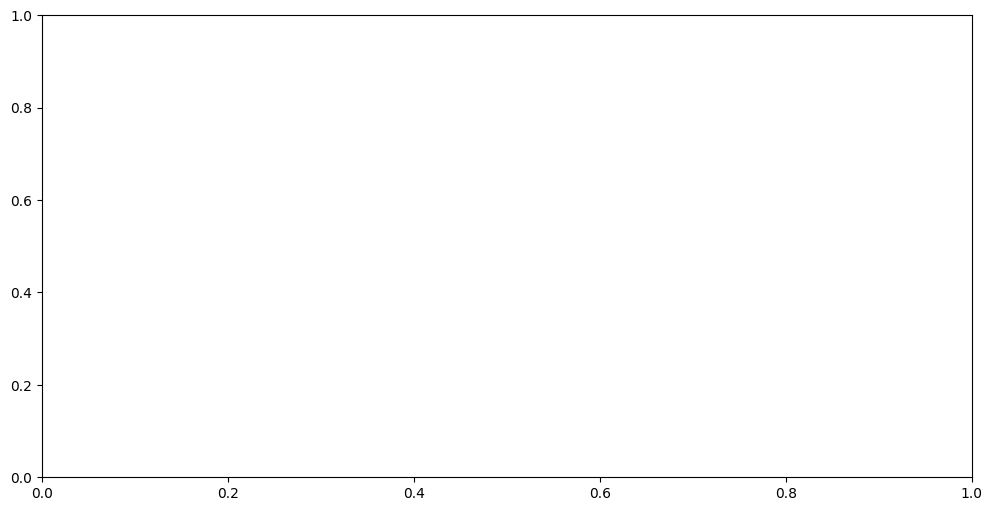

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import load_model

# Load the saved models
lstm_msft_tweet = load_model("LSTM_MSFT_TWEET.h5")
lstm_msft_news = load_model("LSTM_MSFT_NEWS.h5")
lstm_tsla_tweet = load_model("LSTM_TSLA_TWEET.h5")
lstm_tsla_news = load_model("LSTM_TSLA_NEWS.h5")

# Load the actual stock price data (Replace with your actual dataset)
y_msft = pd.read_csv("/content/msft_2019.csv")  # Microsoft actual prices
y_tsla = pd.read_csv("/content/tsla_2019.csv")  # Tesla actual prices

# Load the predicted prices (Replace with your prediction output)
msft_tweet_pred = pd.read_csv("/content/Merge_MSFT_TWEET.csv")  # Microsoft predicted (Tweet Sentiment)
msft_news_pred = pd.read_csv("/content/Merge_MSFT_NEWS.csv")  # Microsoft predicted (News Sentiment)
tsla_tweet_pred = pd.read_csv("/content/Merge_TSLA_TWEET.csv")  # Tesla predicted (Tweet Sentiment)
tsla_news_pred = pd.read_csv("/content/Merge_TSLA_NEWS.csv")  # Tesla predicted (News Sentiment)

# Plot for Microsoft (Tweet Sentiment)
plt.figure(figsize=(12, 6))
plt.plot(y_msft, label="Actual Stock Price", color="blue")
plt.plot(msft_tweet_pred, label="Predicted Price (Tweet Sentiment)", color="green", linestyle="dashed")
plt.title("Stock Price Prediction for Microsoft Using LSTM (Tweet Sentiment)")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# Plot for Microsoft (News Sentiment)
plt.figure(figsize=(12, 6))
plt.plot(y_msft, label="Actual Stock Price", color="blue")
plt.plot(msft_news_pred, label="Predicted Price (News Sentiment)", color="red", linestyle="dashed")
plt.title("Stock Price Prediction for Microsoft Using LSTM (News Sentiment)")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# Plot for Tesla (Tweet Sentiment)
plt.figure(figsize=(12, 6))
plt.plot(y_tsla, label="Actual Stock Price", color="blue")
plt.plot(tsla_tweet_pred, label="Predicted Price (Tweet Sentiment)", color="green", linestyle="dashed")
plt.title("Stock Price Prediction for Tesla Using LSTM (Tweet Sentiment)")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# Plot for Tesla (News Sentiment)
plt.figure(figsize=(12, 6))
plt.plot(y_tsla, label="Actual Stock Price", color="blue")
plt.plot(tsla_news_pred, label="Predicted Price (News Sentiment)", color="red", linestyle="dashed")
plt.title("Stock Price Prediction for Tesla Using LSTM (News Sentiment)")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.legend()
plt.show()
